## Notebook 3: Modeling
This notebook is a sequel to notebook 2 on data cleaning and EDA. This notebook seeks to execute the models and evaluate the performances using various classifiers. I will then select the best model to answer the problem statement of correct classifying a post its respective subreddit based on accuracy.

## Imports

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import *
import sklearn.metrics as metrics

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/model_df.csv')

In [3]:
df.head()

,subreddit,text,title,author,text_length,word_count
0,depression,happens getting addicted pain overthinking wei...,extreme overthinking issues,no-cryptographer-68,222,45
1,depression,impossible get help deathwish simply forced dr...,why is there no help,delicious_sponge,850,171
2,depression,guess sure might enjoy sure even guess gotten ...,i wish i had managed to kill myself the first ...,yourlittlemonster,301,61
3,depression,sad thinking committing suicide sigh,NaN,targetresponsible719,48,9
4,depression,fucking ugly disgusting big fucking forehead s...,honestly,tacowh0ree,465,98


In [4]:
df.isnull().sum()

subreddit      0
text           5
title          5
author         0
text_length    0
word_count     0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(3734, 6)

### Model Prep

#### Create custom stopwords list to add to default stopwords

In [7]:
df['subreddit'] = df['subreddit'].map({'depression': int(0), 'foreveralone': int(1)})

In [8]:
stop = stopwords.words("english")

In [9]:
custom_stopwords = ['im', 'like', 'wa', 'dont','feel', 'life', 'time', 'ive', 'really', 'think', 'make', 
                    'people', 'year', 'thing', 'friend', 'day', 'ha', 'way', 'got', 'know', 'want', 'good', 'say',
                    'word', 'going', 'didnt', 'work', 'thought', 'talk', 'love', 'feeling', 'thats', 'said']

In [10]:
stop.extend(custom_stopwords)

## First Pass: Initial Models with Default Parameters

For the first iteration of my modeling process, i am going to use default parameters to run the 4 different classifiers - Logistic Regression, Random Forest, K Nearest Neighbours, Multinomial Naive Bayes. I will do an evaluation after the process.

We will start off with defining our X and Y, doing a train test split along with identifying the baseline accuracy.

In [11]:
# Define X & Y
X = df['text']
y = df['subreddit']

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Baseline Accuracy

In [12]:
# Baseline Accuracy
y.value_counts(normalize = True)

0    0.510712
1    0.489288
Name: subreddit, dtype: float64

### Logistic Regression

In [13]:
# Set Pipeline
pipe_lr = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('lr', LogisticRegression())])

In [14]:
# Generating scores
train_score_lr = pipe_lr.score(X_train, y_train)
print(f'Logistic Regression Train Score:', train_score_lr)
pred_lr = pipe_lr.predict(X_test)
accuracy_lr =  accuracy_score(pred_lr, y_test)
print(f'Logistic Regression Accuracy Score:', accuracy_lr)
var_lr = train_score_lr - accuracy_lr
print(f'Logistic Regression Variance:', var_lr)
crossval_lr = cross_val_score(pipe_lr, X, y, cv=5)
print(f'Logistic Regression Cross Validation Score:', crossval_lr.mean())
preds_lr = pipe_lr.predict_proba(X_test)[:,1]
roc_lr = roc_auc_score(y_test, preds_lr)
print(f'Logistic Regression ROC_AUC Score:', roc_lr)

Logistic Regression Train Score: 0.9312275089964014
Logistic Regression Accuracy Score: 0.8248175182481752
Logistic Regression Variance: 0.10640999074822621
Logistic Regression Cross Validation Score: 0.8275342657493244
Logistic Regression ROC_AUC Score: 0.9089323355817875


### Random Forest

In [15]:
# Redefine X & Y
X = df['text']
y = df['subreddit']

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# Set Pipeline
pipe_rf = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state=42))])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()),
                ('rf', RandomForestClassifier(random_state=42))])

In [17]:
train_score_rf = pipe_rf.score(X_train, y_train)
print(f'Random Forest Train Score:', train_score_rf)
pred_rf = pipe_rf.predict(X_test)
accuracy_rf =  accuracy_score(pred_rf, y_test)
print(f'Random Forest Accuracy Score:', accuracy_rf)
var_rf = train_score_rf - accuracy_rf
print(f'Random Forest Variance:', var_rf)
crossval_rf = cross_val_score(pipe_rf, X, y, cv=5)
print(f'Random Forest Cross Validation Score:', crossval_rf.mean())
preds_rf = pipe_rf.predict_proba(X_test)[:,1]
roc_rf = roc_auc_score(y_test, preds_rf)
print(f'Random Forest ROC_AUC Score:', roc_rf)

Random Forest Train Score: 1.0
Random Forest Accuracy Score: 0.7996755879967559
Random Forest Variance: 0.20032441200324413
Random Forest Cross Validation Score: 0.8020905785788373
Random Forest ROC_AUC Score: 0.8843209844013491


### K Nearest Neighbours

In [18]:
# Redefine X & Y
X = df['text']
y = df['subreddit']

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# Set Pipeline
pipe_knn = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=2))])

pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

In [20]:
train_score_knn = pipe_knn.score(X_train, y_train)
print(f'K Nearest Neighbours Train Score:', train_score_knn)
pred_knn = pipe_knn.predict(X_test)
accuracy_knn =  accuracy_score(pred_knn, y_test)
print(f'K Nearest Neighbours Accuracy Score:', accuracy_knn)
var_knn = train_score_knn - accuracy_knn
print(f'K Nearest Neighbours Variance:', var_knn)
crossval_knn = cross_val_score(pipe_knn, X, y, cv=5)
print(f'K Nearest Neighbours Cross Validation Score:', crossval_knn.mean())
preds_knn = pipe_knn.predict_proba(X_test)[:,1]
roc_knn = roc_auc_score(y_test, preds_knn)
print(f'K Nearest Neighbours ROC_AUC Score:', roc_knn)

K Nearest Neighbours Train Score: 0.8428628548580568
K Nearest Neighbours Accuracy Score: 0.683698296836983
K Nearest Neighbours Variance: 0.15916455802107377
K Nearest Neighbours Cross Validation Score: 0.671132429629151
K Nearest Neighbours ROC_AUC Score: 0.748477023608769


### Multinomial Naive Bayes

In [21]:
# Redefine X & Y
X = df['text']
y = df['subreddit']

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# Set Pipeline
pipe_mnb = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('mnb', MultinomialNB())])

pipe_mnb.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [23]:
train_score_mnb = pipe_mnb.score(X_train, y_train)
print(f'Multinomial Naive Bayes Train Score:', train_score_mnb)
pred_mnb = pipe_mnb.predict(X_test)
accuracy_mnb =  accuracy_score(pred_mnb, y_test)
print(f'Multinomial Naive Bayes Accuracy Score:', accuracy_mnb)
var_mnb = train_score_mnb - accuracy_mnb
print(f'Multinomial Naive Bayes Variance:', var_mnb)
crossval_mnb = cross_val_score(pipe_mnb, X, y, cv=5)
print(f'Multinomial Naive Bayes Cross Validation Score:', crossval_mnb.mean())
preds_mnb = pipe_mnb.predict_proba(X_test)[:,1]
roc_mnb = roc_auc_score(y_test, preds_mnb)
print(f'Multinomial Naive Bayes ROC_AUC Score:', roc_mnb)

Multinomial Naive Bayes Train Score: 0.9196321471411435
Multinomial Naive Bayes Accuracy Score: 0.8215733982157339
Multinomial Naive Bayes Variance: 0.09805874892540956
Multinomial Naive Bayes Cross Validation Score: 0.8146778355602932
Multinomial Naive Bayes ROC_AUC Score: 0.9090930649241147


### Summary of First Pass

In [24]:
# Create a df to compare results between models
first_pass_df = pd.DataFrame([[train_score_lr, train_score_rf, train_score_knn, train_score_mnb],
                              [accuracy_lr, accuracy_rf, accuracy_knn, accuracy_mnb],
                              [var_lr, var_rf, var_knn, var_mnb],
                              [crossval_lr.mean(), crossval_rf.mean(), crossval_knn.mean(), crossval_mnb.mean()],
                              [roc_lr, roc_rf, roc_knn, roc_mnb]], 
                              columns = ["Logistic Regression", "Random Forest", "K Nearest Neighbours", "Multinomial Naive Bayes"], 
                              index=["Train Score", "Accuracy Score", "Variance", "Cross Val", "ROC AUC Score"])
first_pass_df

,Logistic Regression,Random Forest,K Nearest Neighbours,Multinomial Naive Bayes
Train Score,0.931228,1.000000,0.842863,0.919632
Accuracy Score,0.824818,0.799676,0.683698,0.821573
Variance,0.106410,0.200324,0.159165,0.098059
Cross Val,0.827534,0.802091,0.671132,0.814678
ROC AUC Score,0.908932,0.884321,0.748477,0.909093


### First Pass Evaluation

Under this iteration, both the Logistic Regression, Random Forest and Multinomial Naive Bayes model had the similar scores, minus the very high train score for Random Forest which coincidences with the highest variance. The K Nearest Neighbours model, however, did very poorly with the lowest scores in almost all score types.

Next we are going to try tuning the models to find the best hyperparameters and select the best model from there for our final model evaluation.

## Second Pass: Models with GridSearch Tuning

In this section, i am going to tune the hyper paramaters to spice things up and identify the best paramaters using grid search and custom hyperparameters for each classifier.

In [25]:
# Redefine X & Y
X = df['text']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Creating Pipeline and GridSearch Function to Tune Hyperparameters

### Logistic Regression

In [26]:
#code adapted from James Ellis

def lr_pipe_func(pipe, params):
    ''' Function to execute Gridsearch CV to find 
        best parameters for Logistic Regression Model 
        Output returns the relevant scores'''
    gs_lr2 = GridSearchCV(estimator=pipe, param_grid=params, cv=5, verbose=1, n_jobs=6)
    gs_lr2.fit(X_train, y_train)
    train_score_lr2 = gs_lr2.score(X_train, y_train)
    print(f'Training Score:', train_score_lr2)
    y_pred_lr2 = gs_lr2.best_estimator_.predict(X_test)
    accuracy_lr2 = accuracy_score(y_pred_lr2, y_test)
    print(f"Accuracy Score:", accuracy_lr2)
    var_lr2 = train_score_lr2 - accuracy_lr2
    print(f"Variance:", var_lr2)
    crossval_lr2 = gs_lr2.best_score_
    print(f'CrossVal Score:', crossval_lr2)
    y_pred_prob_lr2 = gs_lr2.best_estimator_.predict_proba(X_test)[:, 1]
    roc_lr2 = roc_auc_score(y_test, y_pred_prob_lr2)
    print(f"ROC_AUC Score:", roc_lr2)
    print(f'Best Params:{gs_lr2.best_params_}')
    return gs_lr2

In [27]:
lr_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ("logreg", LogisticRegression())
])

lr_params = {
    'tvec__max_df': (0.5, 0.75, 1.0),
    'tvec__max_features': (None, 1000, 2000, 3000),
    'tvec__ngram_range': ((1, 1),),
    "logreg__penalty": ["l1", "l2"],
    "logreg__C": [0.001,0.01,0.1,1,10,100]
}

# running the gridsearch on the whole thing
lr_model = lr_pipe_func(lr_pipe, lr_params)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   13.5s
[Parallel(n_jobs=6)]: Done 720 out of 720 | elapsed:   22.8s finished


Training Score: 0.9312275089964014
Accuracy Score: 0.8248175182481752
Variance: 0.10640999074822621
CrossVal Score: 0.8268686626746508
ROC_AUC Score: 0.9089323355817875
Best Params:{'logreg__C': 1, 'logreg__penalty': 'l2', 'tvec__max_df': 0.5, 'tvec__max_features': None, 'tvec__ngram_range': (1, 1)}


### Random Forest

In [28]:
def rf_pipe_func(pipe, params):
    ''' Function to execute Gridsearch CV to find
        best parameters for Random Forest model.
        Output returns the relevant scores'''
    gs_rf2 = GridSearchCV(estimator=pipe, param_grid=params, cv=5, verbose=1, n_jobs=6)
    gs_rf2.fit(X_train, y_train)
    train_score_rf2 = gs_rf2.score(X_train, y_train)
    print(f'Training Score:', train_score_rf2)
    y_pred_rf2 = gs_rf2.best_estimator_.predict(X_test)
    accuracy_rf2 = accuracy_score(y_pred_rf2, y_test)
    print(f"Accuracy Score:", accuracy_rf2)
    var_rf2 = train_score_rf2 - accuracy_rf2
    print(f"Variance:", var_rf2)
    crossval_rf2 = gs_rf2.best_score_
    print(f'CrossVal Score:', crossval_rf2)
    y_pred_prob_rf2 = gs_rf2.best_estimator_.predict_proba(X_test)[:, 1]
    roc_rf2 = roc_auc_score(y_test, y_pred_prob_rf2)
    print(f"ROC_AUC Score:", roc_rf2)
    print(f'Best Params:{gs_rf2.best_params_}')
    return gs_rf2

In [29]:
rf_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ("rand_for", RandomForestClassifier(random_state=42))
])

rf_params = {
    'tvec__max_df': (0.5, 0.75, 1.0),
    'tvec__max_features': (None, 1000, 2000, 3000),
    'tvec__ngram_range': ((1, 1),),
    "rand_for__n_estimators": [50, 100, 150],
    "rand_for__max_depth": [100, 200, 300],
    "rand_for__min_samples_split": [5, 25, 50],
    "rand_for__criterion": ['gini', 'entropy'],
}

# running the gridsearch on the whole thing
rf_model = rf_pipe_func(rf_pipe, rf_params)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   31.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  6.5min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  8.7min
[Parallel(n_jobs=6)]: Done 3240 out of 3240 | elapsed:  8.9min finished


Training Score: 0.9860055977608957
Accuracy Score: 0.7939983779399837
Variance: 0.19200721982091196
CrossVal Score: 0.812470259481038
ROC_AUC Score: 0.8846727445193928
Best Params:{'rand_for__criterion': 'gini', 'rand_for__max_depth': 100, 'rand_for__min_samples_split': 25, 'rand_for__n_estimators': 150, 'tvec__max_df': 0.5, 'tvec__max_features': None, 'tvec__ngram_range': (1, 1)}


### KNN

In [30]:
def knn_pipe_func(pipe, params):
    ''' Function to execute Gridsearch CV to find
        best parameters for K Nearest Neighbours model. 
        Output returns the relevant scores'''
    gs_knn2 = GridSearchCV(estimator=pipe, param_grid=params, cv=5, verbose=1, n_jobs=6)
    gs_knn2.fit(X_train, y_train)
    train_score_knn2 = gs_knn2.score(X_train, y_train)
    print(f'Training Score:', train_score_knn2)
    y_pred_knn2 = gs_knn2.best_estimator_.predict(X_test)
    accuracy_knn2 = accuracy_score(y_pred_knn2, y_test)
    print(f"Accuracy Score:", accuracy_knn2)
    var_knn2 = train_score_knn2 - accuracy_knn2
    print(f"Variance:", var_knn2)
    crossval_knn2 = gs_knn2.best_score_
    print(f'CrossVal Score:', crossval_knn2)
    y_pred_prob_knn2 = gs_knn2.best_estimator_.predict_proba(X_test)[:, 1]
    roc_knn2 = roc_auc_score(y_test, y_pred_prob_knn2)
    print(f"ROC_AUC Score:", roc_knn2)
    print(f'Best Params:{gs_knn2.best_params_}')
    return gs_knn2

In [31]:
knn_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ("knn", KNeighborsClassifier())
])

knn_params = {
    'tvec__max_df': (0.5, 0.75, 1.0),
    'tvec__max_features': (None, 1000, 2000, 3000),
    'tvec__ngram_range': ((1, 1),),
    "knn__n_neighbors": [75, 85, 95]
}

# running the gridsearch on the whole thing
knn_model = knn_pipe_func(knn_pipe, knn_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:   13.5s finished


Training Score: 0.8296681327469012
Accuracy Score: 0.8029197080291971
Variance: 0.02674842471770411
CrossVal Score: 0.8084774451097804
ROC_AUC Score: 0.8888503899662732
Best Params:{'knn__n_neighbors': 75, 'tvec__max_df': 0.5, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 1)}


### Multinomial Naive Bayes

In [32]:
def mnb_pipe_func(pipe, params):
    ''' Function to execute Gridsearch CV to find
        best parameters for Multinomial Naive Bayes model. 
        Output returns the relevant scores'''
    gs_mnb2 = GridSearchCV(estimator=pipe, param_grid=params, cv=5, verbose=1, n_jobs=6)
    gs_mnb2.fit(X_train, y_train)
    train_score_mnb2 = gs_mnb2.score(X_train, y_train)
    print(f'Training Score:', train_score_mnb2)
    y_pred_mnb2 = gs_mnb2.best_estimator_.predict(X_test)
    accuracy_mnb2 = accuracy_score(y_pred_mnb2, y_test)
    print(f"Accuracy Score:", accuracy_mnb2)
    var_mnb2 = train_score_mnb2 - accuracy_mnb2
    print(f"Variance:", var_mnb2)
    crossval_mnb2 = gs_mnb2.best_score_
    print(f'CrossVal Score:', crossval_mnb2)
    y_pred_prob_mnb2 = gs_mnb2.best_estimator_.predict_proba(X_test)[:, 1]
    roc_mnb2 = roc_auc_score(y_test, y_pred_prob_mnb2)
    print(f"ROC_AUC Score:", roc_mnb2)
    print(f'Best Params:{gs_mnb2.best_params_}')
    return gs_mnb2

In [33]:
mnb_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ("mnb", MultinomialNB())
])

mnb_params = {
    'tvec__max_df': (0.5, 0.75, 1.0),
    'tvec__max_features': (None, 1000, 2000, 3000),
    'tvec__ngram_range': ((1, 1),),
    "mnb__alpha": [0.125, 0.15, 0.175]
}

# running the gridsearch on the whole thing
mnb_model = mnb_pipe_func(mnb_pipe, mnb_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    7.7s finished


Training Score: 0.8620551779288285
Accuracy Score: 0.8288726682887266
Variance: 0.03318250964010183
CrossVal Score: 0.8204742514970059
ROC_AUC Score: 0.9065266652613828
Best Params:{'mnb__alpha': 0.125, 'tvec__max_df': 0.5, 'tvec__max_features': 1000, 'tvec__ngram_range': (1, 1)}


## Summary of Second Pass

In [34]:
# Create a new df
second_model_df = pd.DataFrame(index=["Logistic Regression", "Random Forest", "K Nearest Neighbours", "Multinomial Naive Bayes"])
                               
models = [lr_model, rf_model, knn_model, mnb_model]

# putting in the columns
second_model_df["Train Score"] = [round(model.score(X_train, y_train), 4) for model in models]
second_model_df["Accuracy"] = [round(model.score(X_test, y_test), 4) for model in models]
second_model_df["Variance"] = second_model_df["Train Score"] - second_model_df["Accuracy"]
second_model_df["Cross Val"] = [round(model.best_score_, 4) for model in models]

second_model_df                              

,Train Score,Accuracy,Variance,Cross Val
Logistic Regression,0.9312,0.8248,0.1064,0.8269
Random Forest,0.9860,0.7940,0.1920,0.8125
K Nearest Neighbours,0.8297,0.8029,0.0268,0.8085
Multinomial Naive Bayes,0.8621,0.8289,0.0332,0.8205


In [35]:
first_pass_df

,Logistic Regression,Random Forest,K Nearest Neighbours,Multinomial Naive Bayes
Train Score,0.931228,1.000000,0.842863,0.919632
Accuracy Score,0.824818,0.799676,0.683698,0.821573
Variance,0.106410,0.200324,0.159165,0.098059
Cross Val,0.827534,0.802091,0.671132,0.814678
ROC AUC Score,0.908932,0.884321,0.748477,0.909093


In the second iteration, we see a slight decrease across the models in train scores except for Logistic Regression model. Accuracy score remains consistent with K Nearest Neighbours model having a huge increase from 0.6836 in the first model to 0.8029 in the second model. Variance also remains rather consistent except for K Nearest Neighbours model having an increase which probably correlated to the improvement in accuracy score as the model tries to fit better. This also results in an improvement in cross validation scores for K Nearest Neighbours while the other models remains constant. 

Overall, all the Logistic Regression and Multinomial Naive Bayes model have relatively close scores. For my final model, i have decided to go with the Multinomial Naive Bayes model due to it having the lowest variance and highest accuracy score. Hence this model does not models the training data too well and can provide a more accurate prediction as it can better generalise on new data. It has a significant improvement (0.8289) compared to the baseline model (0.5107) in terms of accuracy score, topping it by about 32%. On the other hand, the Logistic Regression model has a relatively higher training score compared to the Multinomial Naive Bayes model, suggesting a lower bias, but it is countered by a higher variance.

As our main goal is to correctly predict which subreddit a post belongs in, accuracy plays a big part in model selection. It is important to ensure a post is correctly classified depression or forever alone in line with our problem statement.

## Final Model
### Multinomial Naive Bayes Model Fitted with Best Hyperparameters

In [36]:
# Redefine X & Y
X = df['text']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
# Set Pipeline
final_model_pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_df=0.5, max_features=1000, ngram_range=(1, 1))),
    ('mnb', MultinomialNB(alpha=0.125))])

final_model = final_model_pipe.fit(X_train, y_train)

In [38]:
# Gather final model results
train_final_model = final_model.score(X_train, y_train)
print(f'Final Model Training Score:', train_final_model)

accuracy_final_model = final_model.score(X_test, y_test)
print(f"Final Model Accuracy Score:", accuracy_final_model)

var_final_model = train_final_model - accuracy_final_model
print(f"Final Model Variance:", var_final_model)

crossval_final_model = cross_val_score(final_model, X_train, y_train, cv=5).mean()
print(f"Final Model Cross Validation Score:", crossval_final_model)

y_pred_final_model = final_model.predict(X_test)
roc_final_model = roc_auc_score(y_test, y_pred_final_model)
print(f"Final Model ROC AUC Score:", roc_final_model)

final_model_df = pd.DataFrame(index=["Multinomial Naive Bayes Final Model"])
final_model_df["Train Score"] = [round(train_final_model, 4)]
final_model_df["Accuracy"] = [round(accuracy_final_model, 4)]
final_model_df["Variance"] = final_model_df["Train Score"] - final_model_df["Accuracy"]
final_model_df["Cross Val Score"] = [round(crossval_final_model, 4)]
final_model_df["ROC_AUC Score"] = [round(roc_final_model, 4)]

final_model_df

Final Model Training Score: 0.8620551779288285
Final Model Accuracy Score: 0.8288726682887266
Final Model Variance: 0.03318250964010183
Final Model Cross Validation Score: 0.8204742514970059
Final Model ROC AUC Score: 0.8282830944350759


,Train Score,Accuracy,Variance,Cross Val Score,ROC_AUC Score
Multinomial Naive Bayes Final Model,0.8621,0.8289,0.0332,0.8205,0.8283


### Receiver Operating Characteristrics (ROC) Curve
Another way to justify my reason for selecting the Multinomial Naive Bayes model is by visualizing the ROC Curve and calculating the Area Under Curve (AUC). This curve plots the true positive rate against the false positive rate to show us how the model makes decisions.

In [39]:
def roc(probas, true, step=0.01):
    """
    probas should be a numpy array of predict_probas
    true is a pandas series of true labels
    step is the step size for checking thresholds
    """
    
    probas = probas[:,1]  # The output of predict_proba() is an array of the probabilities for every class, but we only want the probabilities for class 1
    true = true.values    # We need to convert the class labels from a Pandas Series to a numpy array. We do this using the .values attribute
    assert(len(probas) == len(true)) # We're making sure that our probabilities vector is the same length as our true class labesl vector
    
    TPRs = [] # Setting up empty list of True Positive Rate
    FPRs = [] # Setting up empty list of False Positive Rate
    
    for i in np.arange(0.0,1.0,step): # np.arange allows us to use step sizes that are decimals
        preds_class = probas > i # Numpy arrays have a feature called 'broadcasting.' Check the documentation: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html to see what this does.
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): # We're comparing each prediction with each true value here

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) # Calculating TPR and FPR and appending to our lists
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.figure(figsize=(10,10))
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange", label='ROC Curve')
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--', label='Baseline')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.legend()
    plt.show();

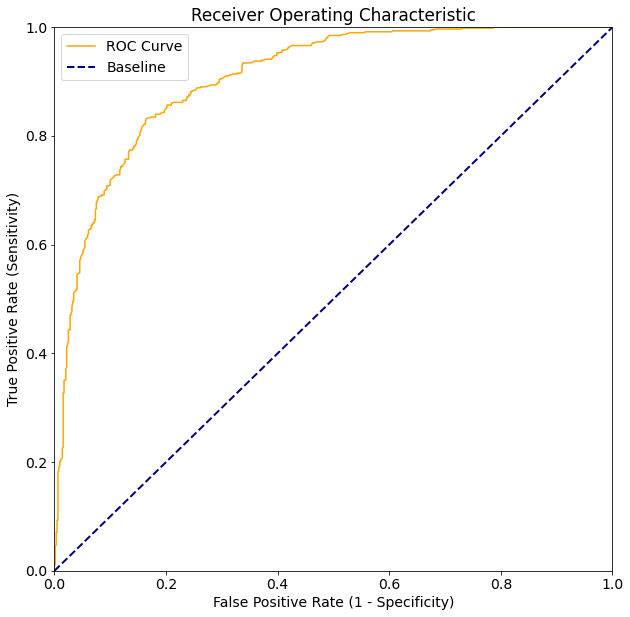

In [40]:
probabilities = final_model.predict_proba(X_test)

roc(probas = probabilities, # pass in series of probabilities 
    true = y_test,          # pass in series of true values
    step=0.001); 

Final Model ROC AUC Score: 0.8283
    
The ROC curve has a decently smooth curve, with the apex of the curve appearing to between a sensitivity range of 0.7 to 0.9. Hence, this apex would be the best point of probability to classify whether a post belong to the depression or forever alone subreddit.

### Confusion Matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making. (Analytics Vidhya)

Accuracy: 0.8288726682887266
Specificity: 0.84375
Sensitivity: 0.8128161888701517
Precision: 0.8281786941580757


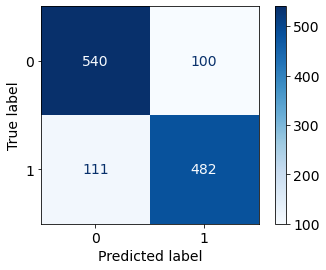

In [41]:
# Get predictions
y_pred_final_model = final_model.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_final_model).ravel()

# Plot Confusion Matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d');

# Calculate Accuracy using confusion matrix
acc = (tp + tn) / (tp + tn + fp + fn) 

# Calculate the True Negative Rate / Specificity
spec = tn / (tn + fp)

# True Positive Rate / Sensitivity
sen = tp / (tp + fn)

# Precision
prec = tp / (tp + fp)

print('Accuracy:' , acc)
print('Specificity:', spec)
print('Sensitivity:', sen)
print('Precision:', prec)

As seen from the confusion matrix, a False Positive (FP) value of 100, means 100 posts in the Forever Alone subreddit were incorrectly classified as belonging to the Depression subreddit. On the other hand, a False Negative (FN) value of 111 means 111 posts in Depression subreddit were incorrectly classified as belonging to the Forever Alone subreddit. 540 Depression subreddit posts were correctly classfied and 482 Forever Alone posts were correctly classified.

## Conclusion, Summary and Recommendations

This project about binary classification problem has been an interesting one yet tricky one. The goal of the project is to use Natural Language Processing (NLP) to train a classifier on which subreddit a given post came from. In this case it would be to come up with a model that can best effecfively classify if a post in a subreddit is from the Depression or Forever Alone subreddit based on the post text.

Through several testing and iterations, i have chosen to go with the Multinomial Naive Bayes model based on test results in comparison with the other models like Logistic Regression, K Nearest Neighbours and Random Forest. With consistently higher scores and low variance, the model manage to produce a 83% accuracy which is 33% higher of the baseline accuracy of 51%.

This results may not be the best but the model could be pretty useful and applicable in real situations. It could be a key factor in early detection of depression based on (1) correct classification of a post in the Depression subreddit and (2) words used by a user in his/her post.

In addition, during the exploratory data analysis segment, i figured out the top unique words in the top 50 common words of both subreddit by removing high frequency common words in both dataframes. These words suggest that a post belong to a particular subreddit. However, some of those words like better, bad, need are pretty generic and does not tells much about the full story.

Hence, i further zoomed in on the words that are totally unique (not just unique in the top 50 most common words) that classifies a person posting in the depression subreddit. The top 10 words include: med, diagnosed, antidepressant, psychiatrist, depressive, disappear, disorder, cutting, mum, treatment.

These more powerful words clearer show the factors affecting the potentially depressed user. By finding these unique key words in the depression subreddits, one may be able to identify a potentially depressed user. Along with applying the model, it works towards the problem statement of classifying the correct subreddit.

With regards to future work, given more time, i would like to optimise the model. I ought to explore the effects on other features like word count/length and title words to see how i can come up with a better and more accurate model to classify a post. This features could be useful in affecting the mix in the model as the initial model was purely using the post texts as a variable along with some feature engineering.


## References

Depression subreddit extracted from: https://www.reddit.com/r/depression/

Forever Alone subreddit extracted from: https://www.reddit.com/r/ForeverAlone/comments/muj5p8/i_know_i_will_be_forever_alone/

Confusion Matrix extracted from: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/